Epoch 1/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2748 - val_loss: 0.1887
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1704 - val_loss: 0.1534
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1438 - val_loss: 0.1331
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1278 - val_loss: 0.1205
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1176 - val_loss: 0.1123
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1107 - val_loss: 0.1065
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1057 - val_loss: 0.1023
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1020 - val_loss: 0.0992
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0994 - val_loss: 0.0970
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0976 - val_loss: 0.0956

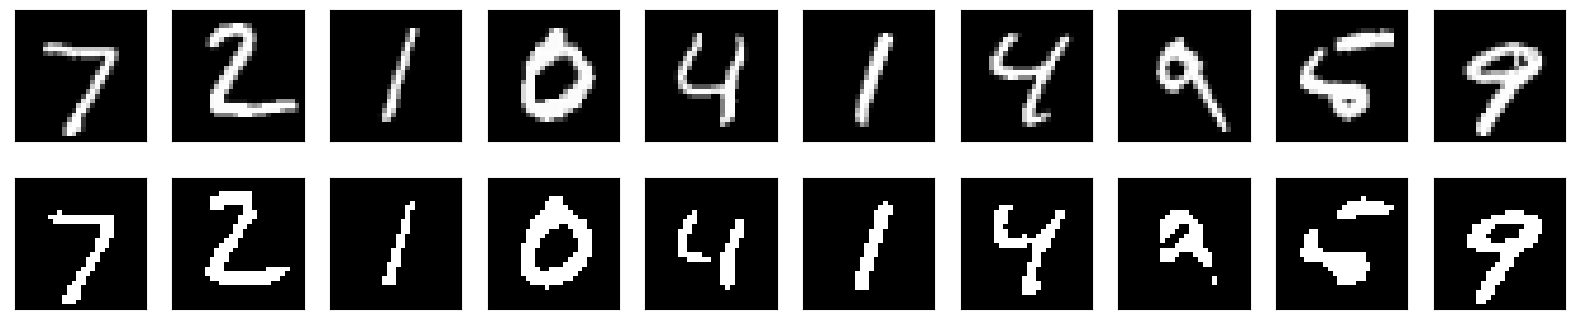

In [19]:
import numpy as np
import matplotlib.pyplot as plt 
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
(x_train,_),(x_test,_) = mnist.load_data()
x_train= x_train.astype('float32')/255
x_test= x_test.astype('float32')/255
x_train= x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
input_img = Input(shape=(784,))
encoded= Dense(32, activation= 'relu')(input_img)
decoded= Dense(784, activation= 'sigmoid')(encoded)
autoencoder= Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss= 'binary_crossentropy')
autoencoder.fit(x_train, x_train,epochs=50, batch_size=256, shuffle= True, validation_data=(x_test, x_test))
test_loss = autoencoder.evaluate(x_test, x_test)
decoded_imgs = autoencoder.predict(x_test)

threshold= 0.5
correct_predictions =np.sum(np.where(x_test >= threshold,1,0) == np.where(decoded_imgs >= threshold, 1,0))
total_pixels= x_test.shape[0] * x_test.shape[1]
test_accuracy= correct_predictions/total_pixels
print("Test loss:",test_loss)
print("Test accuracy:", test_accuracy)
n=10
plt.figure(figsize=(20,4))
for i in range(n):
    ax= plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax= plt.subplot(2,n,i+1+n)
    reconstruction= decoded_imgs[i].reshape(28,28)
    plt.imshow(np.where(reconstruction >= threshold,1.0,0.0))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()